In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Data

In [249]:
df = pd.read_csv("datasets/SampleData.csv")
df.head()

,Time,Cycle,Base,Category,Duration
0,1/11/2019 20:22,1,T,Step1,5.750
1,1/11/2019 20:23,1,T,Step2,14.750
2,1/11/2019 20:23,1,T,Step3,20.781
3,1/11/2019 20:23,1,T,Step4,251.000
4,1/11/2019 20:27,1,T,Step5,7.250


### Are there any missing values in the dataset? 

In [211]:
#There are no missing values. 
df[df.isna()].sum()

Time        0.0
Cycle       0.0
Base        0.0
Category    0.0
Duration    0.0
dtype: float64

In [212]:
#One full cycle. 
df1 = df[df.Cycle == 1]
df1

,Time,Cycle,Base,Category,Duration
0,1/11/2019 20:22,1,T,Step1,5.750
1,1/11/2019 20:23,1,T,Step2,14.750
2,1/11/2019 20:23,1,T,Step3,20.781
3,1/11/2019 20:23,1,T,Step4,251.000
4,1/11/2019 20:27,1,T,Step5,7.250
5,1/11/2019 20:27,1,T,Step6,25.235
6,1/11/2019 20:28,1,T,Step7,5.875
7,1/11/2019 20:28,1,T,Step8,21.469
8,1/11/2019 20:28,1,A,Step1,5.781
9,1/11/2019 20:28,1,A,Step2,14.750


### Descriptive statistics for each cycle.  

In [209]:
#Create a new dataframe after group by.
cycle = df.groupby("Cycle")['Duration'].agg(['count', 'mean', 'min', 'max', 'std', 'sum'])
cycle = cycle.reset_index()
cycle

,Cycle,count,mean,min,max,std,sum
0,1,32,43.019531,5.735,251.110,80.117119,1376.625
1,2,32,44.183125,5.609,251.031,79.895869,1413.860
2,3,32,43.528312,5.703,251.016,80.020367,1392.906
3,4,32,47.203125,5.735,326.344,87.022403,1510.500
4,5,32,44.230937,5.734,250.953,79.889444,1415.390
5,6,32,44.177750,5.703,250.906,80.030752,1413.688
6,7,32,44.806156,5.609,251.016,79.785791,1433.797
7,8,32,43.574688,5.594,254.031,80.291396,1394.390
8,9,32,43.546875,5.641,251.032,80.020022,1393.500
9,10,32,44.748063,5.734,251.109,79.942204,1431.938


### Can we see an increasing cycle time trend? 

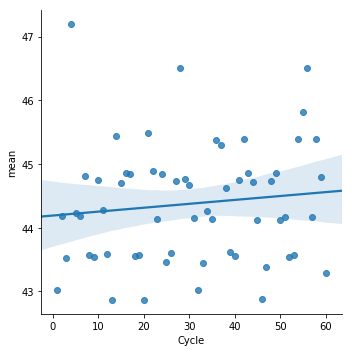

In [160]:
sns.lmplot(data = cycle, y = "mean", x = "Cycle")

There is a slight increase in average time per cycle

### Descriptive Statistics for each step in category. 

In [32]:
df.groupby('Category')['Duration'].describe()
#Steps 3 and 6 have relatively higher standard deviation. 

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Step1,238.0,5.786630,0.132949,5.593,5.75000,5.7660,5.79700,7.078
Step2,238.0,14.713870,0.089042,14.468,14.65700,14.7340,14.76600,14.922
Step3,238.0,31.112803,13.929603,17.812,19.79700,21.1485,39.58600,77.328
Step4,238.0,251.378727,4.904999,250.859,250.93700,250.9680,251.01600,326.344
Step5,238.0,7.129256,0.100473,6.859,7.04700,7.1250,7.21425,7.391
Step6,238.0,17.684063,4.355499,14.938,15.09400,15.2035,22.58225,25.344
Step7,238.0,5.768261,0.080946,5.594,5.73425,5.7650,5.78200,6.360
Step8,238.0,21.526311,0.180006,21.047,21.43800,21.5150,21.59400,23.000


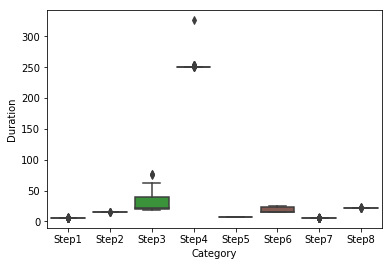

In [80]:
sns.boxplot(x = 'Category', y = 'Duration', data = df)

### Let's take a deeper dive at the PDF/CDF plots for each category step. 

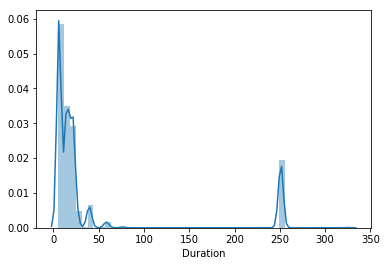

In [163]:
#Distribution of all observations. 
sns.distplot(df['Duration'])

#### Step 1

               Time  Cycle Base Category  Duration
0   1/11/2019 20:22      1    T    Step1     5.750
8   1/11/2019 20:28      1    A    Step1     5.781
16  1/11/2019 20:34      1    C    Step1     5.890
24  1/11/2019 20:40      1    G    Step1     5.813
32  1/11/2019 20:45      2    T    Step1     5.797


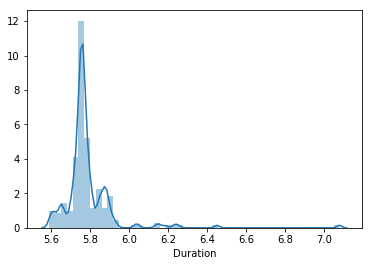

In [93]:
#Subset into step1 category. 
step1 = df[df.Category == 'Step1']
print(step1.head())
sns.distplot(df[df.Category == 'Step1']['Duration']) #Follows a normal distribution with a tail. 

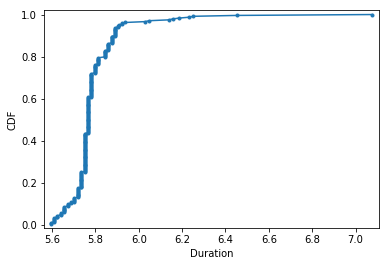

In [142]:
x = np.sort(step1.Duration)
y = np.arange(1, len(x) + 1) / len(x)
cdf1 = plt.plot(x, y, marker = '.', linestyle = '-')
cdf1 = plt.xlabel ('Duration')
cdf1 = plt.ylabel('CDF')
plt.margins(0.02)

#### Step 2

               Time  Cycle Base Category  Duration
1   1/11/2019 20:23      1    T    Step2    14.750
9   1/11/2019 20:28      1    A    Step2    14.750
17  1/11/2019 20:34      1    C    Step2    14.625
25  1/11/2019 20:40      1    G    Step2    14.734
33  1/11/2019 20:45      2    T    Step2    14.734


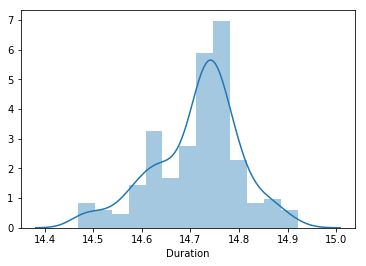

In [111]:
#Subset into step2 category. 
step2 = df[df.Category == 'Step2']
print(step2.head())
sns.distplot(step2['Duration']) #Similar to normal distribution. 

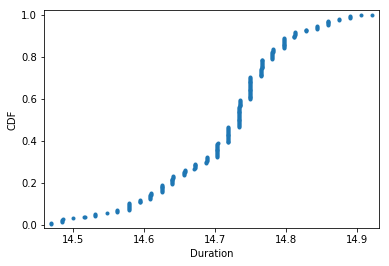

In [116]:
x = np.sort(step2.Duration)
y = np.arange(1, len(x) + 1) / len(x)
cdf2 = plt.plot(x, y, marker = '.', linestyle = 'none')
cdf2 = plt.xlabel ('Duration')
cdf2 = plt.ylabel('CDF')
plt.margins(0.02)

#### Step 3

               Time  Cycle Base Category  Duration
2   1/11/2019 20:23      1    T    Step3    20.781
10  1/11/2019 20:29      1    A    Step3    19.609
18  1/11/2019 20:34      1    C    Step3    19.891
26  1/11/2019 20:40      1    G    Step3    21.328
34  1/11/2019 20:46      2    T    Step3    20.094


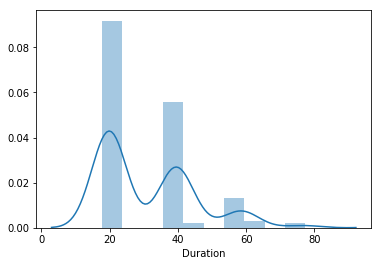

In [62]:
#Subset into step3 category. 
step3 = df[df.Category == 'Step3']
print(step3.head())
sns.distplot(step3['Duration'])

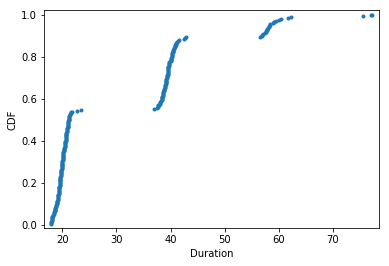

In [117]:
x = np.sort(step3.Duration)
y = np.arange(1, len(x) + 1) / len(x)
cdf3 = plt.plot(x, y, marker = '.', linestyle = 'none')
cdf3 = plt.xlabel ('Duration')
cdf3 = plt.ylabel('CDF')
plt.margins(0.02)

#### Step 4

               Time  Cycle Base Category  Duration
3   1/11/2019 20:23      1    T    Step4   251.000
11  1/11/2019 20:29      1    A    Step4   251.110
19  1/11/2019 20:35      1    C    Step4   250.906
27  1/11/2019 20:40      1    G    Step4   251.000
35  1/11/2019 20:46      2    T    Step4   251.031


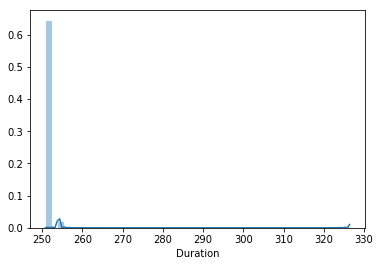

In [61]:
#Subset into step4 category. 
step4 = df[df.Category == 'Step4']
print(step4.head())
sns.distplot(step4['Duration'])

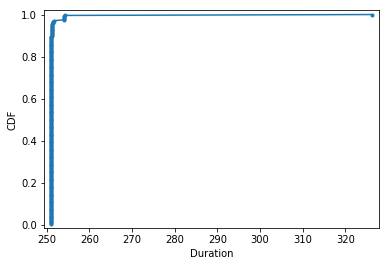

In [143]:
x = np.sort(step4.Duration)
y = np.arange(1, len(x) + 1) / len(x)
cdf4 = plt.plot(x, y, marker = '.', linestyle = '-')
cdf4 = plt.xlabel ('Duration')
cdf4 = plt.ylabel('CDF')
plt.margins(0.02)

#### Step 5

               Time  Cycle Base Category  Duration
4   1/11/2019 20:27      1    T    Step5     7.250
12  1/11/2019 20:33      1    A    Step5     7.218
20  1/11/2019 20:39      1    C    Step5     7.125
28  1/11/2019 20:45      1    G    Step5     7.110
36  1/11/2019 20:50      2    T    Step5     7.125


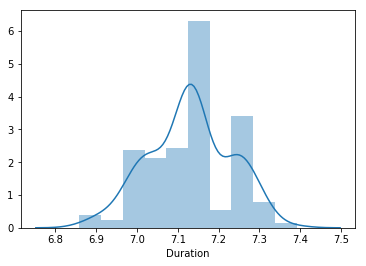

In [64]:
#Subset into step5 category. 
step5 = df[df.Category == 'Step5']
print(step5.head())
sns.distplot(step5['Duration']) #Similar to normal distribution. 

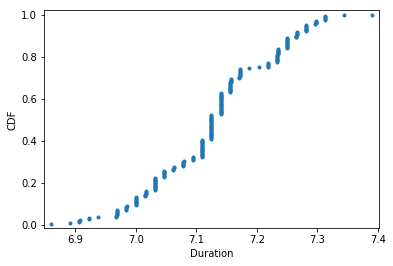

In [145]:
x = np.sort(step5.Duration)
y = np.arange(1, len(x) + 1) / len(x)
cdf5 = plt.plot(x, y, marker = '.', linestyle = 'none')
cdf5 = plt.xlabel ('Duration')
cdf5 = plt.ylabel('CDF')
plt.margins(0.02)

#### Step 6

               Time  Cycle Base Category  Duration
5   1/11/2019 20:27      1    T    Step6    25.235
13  1/11/2019 20:33      1    A    Step6    15.125
21  1/11/2019 20:39      1    C    Step6    15.250
29  1/11/2019 20:45      1    G    Step6    15.312
37  1/11/2019 20:50      2    T    Step6    25.094


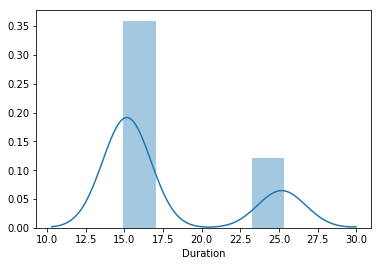

In [127]:
#Subset into step6 category. 
step6 = df[df.Category == 'Step6']
print(step6.head())
sns.distplot(step6['Duration'])

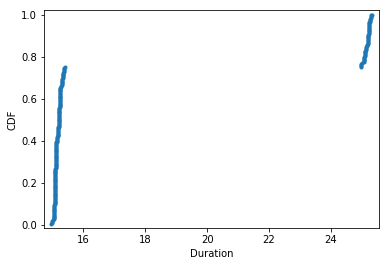

In [123]:
x = np.sort(step6.Duration)
y = np.arange(1, len(x) + 1) / len(x)
cdf6 = plt.plot(x, y, marker = '.', linestyle = 'none')
cdf6 = plt.xlabel ('Duration')
cdf6 = plt.ylabel('CDF')
plt.margins(0.02)

#### Step 7

               Time  Cycle Base Category  Duration
6   1/11/2019 20:28      1    T    Step7     5.875
14  1/11/2019 20:34      1    A    Step7     5.891
22  1/11/2019 20:39      1    C    Step7     5.735
30  1/11/2019 20:45      1    G    Step7     5.782
38  1/11/2019 20:51      2    T    Step7     5.750


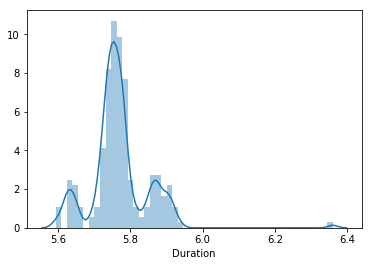

In [65]:
#Subset into step7 category. 
step7 = df[df.Category == 'Step7']
print(step7.head())
sns.distplot(step7['Duration'])

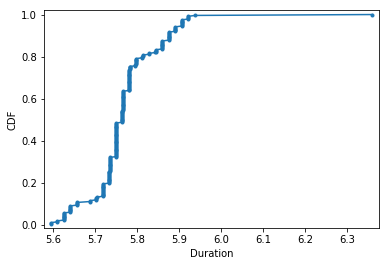

In [146]:
x = np.sort(step7.Duration)
y = np.arange(1, len(x) + 1) / len(x)
cdf7 = plt.plot(x, y, marker = '.', linestyle = '-')
cdf7 = plt.xlabel ('Duration')
cdf7 = plt.ylabel('CDF')
plt.margins(0.02)

#### Step 8

               Time  Cycle Base Category  Duration
7   1/11/2019 20:28      1    T    Step8    21.469
15  1/11/2019 20:34      1    A    Step8    21.469
23  1/11/2019 20:39      1    C    Step8    21.546
31  1/11/2019 20:45      1    G    Step8    21.515
39  1/11/2019 20:51      2    T    Step8    21.688


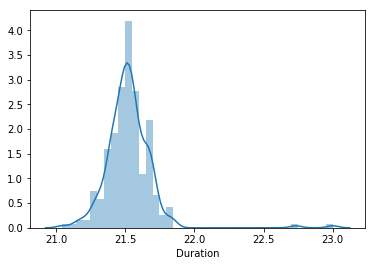

In [67]:
#Subset into step8 category. 
step8 = df[df.Category == 'Step8']
print(step8.head())
sns.distplot(step8['Duration']) #Normal distribution. 

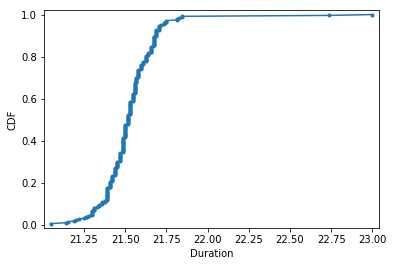

In [147]:
x = np.sort(step8.Duration)
y = np.arange(1, len(x) + 1) / len(x)
cdf8 = plt.plot(x, y, marker = '.', linestyle = '-')
cdf8 = plt.xlabel ('Duration')
cdf8 = plt.ylabel('CDF')
plt.margins(0.02)

### Descriptive Statistics on each base per cycle. 

In [220]:
df.groupby(['Cycle', 'Base'])['Duration'].agg(['sum', 'mean', 'std', 'min', 'max'])

sum       mean         std    min      max
Cycle Base                                                
1     A     340.953  42.619125   84.462245  5.781  251.110
      C     340.968  42.621000   84.385262  5.735  250.906
      G     342.594  42.824250   84.360426  5.782  251.000
      T     352.110  44.013750   83.981796  5.750  251.000
2     A     363.234  45.404250   83.830103  5.891  250.922
      C     340.438  42.554750   84.410143  5.609  250.890
      G     358.875  44.859375   83.965323  5.843  251.000
      T     351.313  43.914125   84.030038  5.750  251.031
3     A     339.547  42.443375   84.488907  5.750  251.016
      C     361.343  45.167875   83.908261  5.703  250.890
      G     342.735  42.841875   84.309672  5.766  250.875
      T     349.281  43.660125   84.054877  5.703  250.890
4     A     415.563  51.945375  111.035156  5.735  326.344
      C     381.391  47.673875   83.997664  5.812  250.859
      G     339.906  42.488250   84.442320  5.765  250.938
      T     373.640  46.705000   83.489877  5.750  250.968
5     A     340.796  42.599500   84.413618  5.750  250.953
      C     360.610  45.076250   83.914790  5.750  250.890
      G     362.015  45.251875   83.931136  5.734  250.953
      T     351.969  43.996125   83.950434  5.750  250.891
6     A     342.593  42.824125   84.320726  5.703  250.891
      C     340.657  42.582125   84.386765  5.735  250.875
      G     340.031  42.503875   84.420014  5.734  250.906
      T     390.407  48.800875   83.511490  5.766  250.875
7     A     361.250  45.156250   83.930987  5.859  250.985
      C     359.985  44.998125   83.948012  5.750  250.937
      G     360.625  45.078125   83.970749  5.609  251.016
      T     351.937  43.992125   83.949316  5.625  250.875
8     A     340.250  42.531250   84.425496  5.718  250.922
      C     360.187  45.023375   83.922954  5.594  250.938
...             ...        ...         ...    ...      ...
53    A     341.375  42.671875   84.365289  5.750  250.906
      C     360.125  45.015625   83.988960  5.766  251.032
      G     340.828  42.603500   84.428829  5.641  250.984
      T     352.078  44.009750   83.961141  5.735  250.937
54    A     341.234  42.654250   84.401556  5.765  250.969
      C     360.422  45.052750   83.920139  5.719  250.938
      G     344.594  43.074250   84.293192  5.766  251.000
      T     406.438  50.804750   84.104442  5.735  251.062
55    A     338.796  42.349500   84.523714  5.719  251.031
      C     398.219  49.777375   84.612648  5.781  250.937
      G     339.860  42.482500   84.440758  5.735  250.922
      T     389.297  48.662125   83.542066  5.750  250.937
56    A     359.437  44.929625   83.987644  5.687  251.047
      C     380.782  47.597750   85.085754  5.735  254.110
      G     398.546  49.818250   84.692965  5.750  251.110
      T     349.656  43.707000   84.096008  5.750  251.016
57    A     341.641  42.705125   84.433643  5.750  251.093
      C     339.922  42.490250   84.496919  5.750  251.078
      G     378.969  47.371125   84.050776  5.719  251.125
      T     352.750  44.093750   83.995748  5.610  251.094
58    A     378.734  47.341750   84.096012  5.594  251.141
      C     381.625  47.703125   84.170105  5.734  251.562
      G     341.703  42.712875   84.421313  5.782  251.063
      T     350.531  43.816375   84.044722  5.750  250.984
59    A     362.516  45.314500   84.023198  5.750  251.250
      C     341.469  42.683625   84.516155  5.766  251.281
      G     378.281  47.285125   84.142691  5.781  251.359
      T     351.125  43.890625   84.021975  5.765  251.000
60    A     341.625  42.703125   84.584234  5.719  251.484
      T     350.984  43.873000   84.167133  5.843  251.359

[238 rows x 5 columns]

#### Can we see a trend for each base per cycle over time? 

   Cycle      sum         std
0      1  340.953   84.462245
1      2  363.234   83.830103
2      3  339.547   84.488907
3      4  415.563  111.035156
4      5  340.796   84.413618


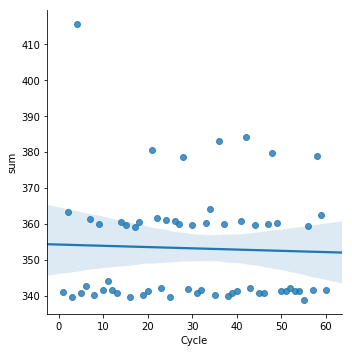

In [246]:
#Adenine
adenine = df[(df.Base == 'A')].groupby('Cycle')['Duration'].agg(['sum', 'std']).reset_index() 
print (adenine.head())
sns.lmplot(data = adenine, x = 'Cycle', y = 'sum')

   Cycle      sum        std
0      1  352.110  83.981796
1      2  351.313  84.030038
2      3  349.281  84.054877
3      4  373.640  83.489877
4      5  351.969  83.950434


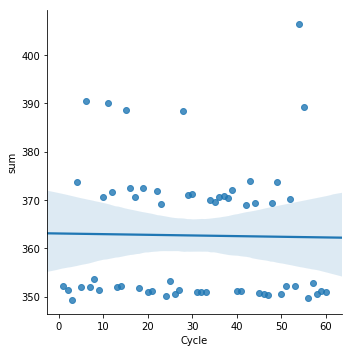

In [247]:
#Thymine
thymine = df[(df.Base == 'T')].groupby('Cycle')['Duration'].agg(['sum', 'std']).reset_index() 
print (thymine.head())
sns.lmplot(data = thymine, x = 'Cycle', y = 'sum')

   Cycle      sum        std
0      1  342.594  84.360426
1      2  358.875  83.965323
2      3  342.735  84.309672
3      4  339.906  84.442320
4      5  362.015  83.931136


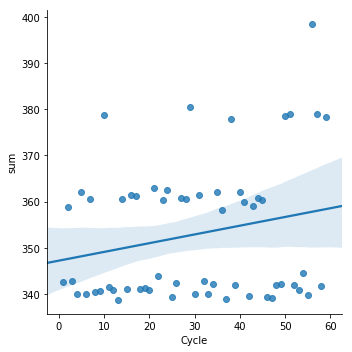

In [243]:
#Guanine
guanine = df[(df.Base == 'G')].groupby('Cycle')['Duration'].agg(['sum', 'std']).reset_index() 
print (guanine.head())
sns.lmplot(data = guanine, x = 'Cycle', y = 'sum')

   Cycle      sum        std
0      1  340.968  84.385262
1      2  340.438  84.410143
2      3  361.343  83.908261
3      4  381.391  83.997664
4      5  360.610  83.914790


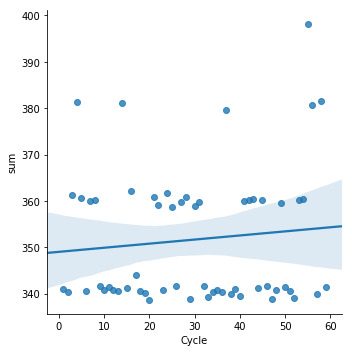

In [242]:
#Cytosine
cytosine = df[(df.Base == 'C')].groupby('Cycle')['Duration'].agg(['sum', 'std']).reset_index() 
print (cytosine.head())
sns.lmplot(data = cytosine, x = 'Cycle', y = 'sum')